# Korki drogowe

## Spis treści
1. [Wstęp](#1)
2. [Podstawowy model](#2)
3. [Rozszerzenie modelu o czas reakcji kierowcy](#3)
4. [Dopasowanie modelu do rzeczywistej sytuacji](#3)<br>
    &emsp; 4.1. [Szczegóły badanej ulicy](#4.1)<br>
    &emsp; 4.2. [Pomiary](#4.2)<br>
    &emsp; 4.3. [Model podstawowy](#4.3)<br>
    &emsp; 4.4. [Model z opóźnieniem](#4.4)
5. [Inne przykłady](#5)<br>
    &emsp; 5.1. [Zwężenie na autostradzie](#5.1)<br>
    &emsp; 5.2. [Rondo](#5.2)
6. [Podsumowanie i wnioski](#6)

## Wstęp<a class="anchor" id="1"></a>

Ruch uliczny wzrasta w ostatnich latach bardzo szybko, co potwierdzają wyniki Generalnego Pomiaru Ruchu przeprowadzanego co pięć lat przez GDDKiA. W ciągu ostatnich pięciu lat średni dobowy ruch w Polsce wzrósł aż o 21%. Dynamicznie rozwijające się miasta takie, jak Wrocław, gdzie cały czas powstają nowe osiedla i przybywa mieszkańców, muszą radzić sobie ze wzrastającym natężeniem na drogach. To zmusza władze do budowania nowych dróg, rozwijania komunikacji miejskiej (by odciągnąć ludzi od samochodów) czy wprowadzania inteligentnych systemów sygnalizacji świetlnej. Postanowiliśmy przyjrzeć się problemowi oraz prawom, którymi rządzą się korki drogowe, by następnie przenieść nasze obserwacje na równania matematyczne w celu przewidzenia długości takich korków. Tak udało nam się sformułować dwa modele, które następnie zastosowaliśmy do jednej z wrocławskich ulic.

## Podstawowy model <a class="anchor" id="2"></a>

Zanim wyprowadzimy równanie opisujące długość korka, zastanówmy się, kiedy powstaje korek drogowy i jakie są tego przyczyny. Potrzebne będzie nam do tego kilka podstawowych pojęć związanych z tematem:
- <b>natężenie ruchu</b> ($n$) - ilość aut przejężdżających przez dany punkt na drodze o swobodnym ruchu w jednostce czasu. Natężenie możemy otrzymać licząc ilość przejeżdżających aut $a$ przez pewien czas $t$, a następnie podstawiąjąc do wzoru
$$ n = \frac{a}{t}, $$

- <b>gęstość ruchu</b> ($g$) - część drogi jaka jest zajęta przez jadące samochody na danym odcinku w jednostce czasu. Gęstość możemy otrzymać po zmierzeniu natężenia $n$, prędkości średniej $v_{śr}$ jadących aut oraz średniej długości samochodu (włącznie z bezpiecznym odstępem) $r$, a następnie korzystając ze wzoru $$ g = \frac{nr}{v_{śr}} = \frac{ar}{v_{śr}t}, $$
przy czym zakładamy, że $g \in [0, 1)$, ponieważ gdyby $g$ było równe 1, to przez bardzo małe odstępy auta nie byłyby w stanie się poruszać,

- <b>przepustowość</b> ($p$) - iloczyn ilości aut $a$ omijających punkt spowalniający ruch na drodze oraz średniej długości samochodu (włącznie z bezpiecznym odstępem) $r$ w jednostce czasu. Żeby otrzymać przepustowość, korzystamy ze wzoru
$$ p = \frac{ar}{t}. $$

Korek tworzy się wtedy, gdy w jakimś punkcie na drodze znajduje się lub pojawia się coś co spowalnia ruch (zmniejsza przepustowość w tym punkcie), przy czym przepustowość musi być mniejsza od natężenia tzn. ilość aut dojeżdżających musi być większa od aut odjeżdżających.

Przykłady miejsc/sytuacji, w których tworzą się korki:
- zwężenie na autostradzie
- światła
- rondo
- wjazd na drogę główną z drogi podporządkowanej

Do ułożenia równania opisującego długość korka w czasie przydatne okazuje się być porównanie samochodów do płynu. By było to możliwe, musimy założyć, że wszystkie auta w korku ruszają jednocześnie, bez opóźnienia. Wtedy korek będzie zachowywał się podobnie do płynu. Drogę interpretujemy jako pionowy kanał, którym płynie woda z prędkością $v_{śr}$. W pewnym momencie kanał ten zostaje częściowo zatkany. Gęstość w tym przypadku oznacza procent wypełnienia kanału wodą podczas swobodnego przepływu, a przepustowość ilość wody, która przepływa przez miejsce zatkania w jednostce czasu. Długością korka będzie poziom wody w kanale od miejsca zatkania - oznaczmy $L$. Jeśli $L(t)$ będzie opisywało poziom wody (długość korka) w czasie, to $L'(t)$ będzie prędkością z jaką ten poziom (korek) rośnie. Ponieważ prędkość płynącej wody $v_{śr}$ oraz prędkość poziomu wody $L'$ mają przeciwne zwroty, to przyrost tego poziomu spowodowany dopłynięciem nowej wody w momencie $t$ będzie wynosił $ \left( v_{śr} + L' \right) g(t) $. Odejmując od tego przepustowość $p(t)$ otrzymamy równanie na przyrost poziomu wody:
$$ L' = \left( v_{śr} + L' \right) g(t) - p(t). $$
Tak przy pomocy odpowiedniego porównania udało nam się otrzymać równanie różniczkowe opisujące długość korka. Następnie po przekształceniu otrzymamy
$$ L' = \frac{v_{śr} g(t) - p(t)}{1 - g(t)}. $$
Rozwiązując równanie dostajemy
$$ L(t) = L_{0} + \int_{0}^{t} \frac{v_{śr} g(t) - p(t)}{1 - g(t)} \mathrm{d}t, $$
gdzie $L_{0}$ - początkowy korek.

Istotnym założeniem jest tutaj to, że $L \geq 0$, co oznacza, że nie każde równanie będzie dało się rozwiązać analitycznie. Będzie to możliwe tylko w przypadku, gdy korek utrzymuje się cały czas i jego długość nie spada poniżej zera. W innym przypadku trzeba wykorzystać metody numeryczne.

In [36]:
# Wczytujemy potrzebne biblioteki
using Plots
using LsqFit
using DataTables

## Rozszerzenie modelu o czas reakcji kierowcy <a class="anchor" id="3"></a>

Poprzednie równanie opisywało długość korka przy założeniu, że wszystkie auta ruszają jednocześnie. Z doświadczenia wiemy, że w rzeczywistości jest inaczej. Auta ruszają jedno za drugim z pewnym opóźnieniem, które nazywać będziemy czasem reakcji. W wyniku tego powstaje zjawisko przypominające falę.

Żeby lepiej zrozumieć to zjawisko rozpatrzmy przykład. Z powodu czerwonych świateł utworzył się korek. Gdy pojawia się zielone światło, pierwsze auto rusza, następnie po czasie reakcji rusza kolejne itd. Powstaje wcześniej wspomniana fala, która porusza się z jakąś prędkością $v_f$. Ostatnie auto ruszy dopiero, gdy fala ta dotrze do niego, czyli pokona odległość równą długości korka. Widzimy zatem, że korek skróci się po pewnym czasie $\Delta t$ od zapalenia się zielonych świateł.

Ponieważ czas $\Delta t$ to czas w jakim fala poruszająca się ze stałą predkością $v_f$ pokona długość korka $L$, to $$\Delta t = \frac{L}{v_f}.$$
Wtedy przepustowość w momencie $t$ będzie równa $p(t - \Delta t) = p\left(t - \frac{L}{v_f}\right)$.

Rozważmy teraz przypadek, w którym w momencie $t = 0$ utworzył się korek o długości $L_0$ oraz natężenie od tego momentu jest zerowe. Mamy jedynie przepustowość $p(t - \frac{L}{v_f})$.  Wtedy długość korka można opisać równaniem
$$ L(t) = L_0 - \int_{0}^{\gamma}p(\tau) \mathrm{d}\tau, $$
gdzie $\gamma = t - \frac{L}{v_f}$. Po zróżniczkowaniu obustronnie względem $\gamma$ otrzymujemy
$$ \frac{dL}{d\gamma} = - p(\gamma). $$
Następnie domnażamy $\frac{d\gamma}{dt}$ i upraszczamy,
$$ \frac{dL}{d\gamma} \frac{d\gamma}{dt} = - p(\gamma) \frac{d\gamma}{dt}, $$
$$ \frac{dL}{dt} = - p(\gamma) \frac{d}{dt} \left(t - \frac{L}{v_f}\right), $$
$$ L' = - \left(1 - \frac{L'}{v_f}\right) p\left(t - \frac{L}{v_f}\right). $$
W ten spośob otrzymaliśmy postać, jaką ma przepustowość w modelu z opóźnieniem. Teraz możemy sformułować pełne równanie zawierające natężenie oraz przepustowość. Ponieważ opóźnienie $\Delta t$ nie wpływa na przyrost nowych samochodów, będzie on taki sam jak w pierwszym modelu tj. $ \left( v_{śr} + L' \right) g(t) $. Zatem równanie opisujące długość korka będzie mieć postać
$$ L' = \left( v_{śr} + L' \right) g(t) - \left(1 - \frac{L'}{v_f}\right) p\left(t - \frac{L}{v_f} \right). $$
Po przekształceniu otrzymujemy
$$ L' = \frac{v_{śr} g(t) - p\left(t - \frac{L}{v_f}\right)}{1 - g(t) - \frac{1}{v_f} p \left(t - \frac{L}{v_f} \right)}. $$
Należy tutaj zaznaczyć, że poza założeniem $L \geq 0$, dochodzi tutaj jeszcze jedno istotne założenie tj. $L' \leq v_f$ wynikające stąd, że gdyby $L' > v_f$, to
$$ \left( 1 - \frac{L'}{v_f} \right) < 0, $$
a wtedy
$$ \left(1 - \frac{L'}{v_f}\right) p\left(t - \frac{L}{v_f} \right) < 0, $$
co byłoby sprzeczne, ponieważ przepustowość nie może być ujemna.

## Dopasowanie modelu do rzeczywistej sytuacji <a class="anchor" id="4"></a>

### Szczegóły badanej ulicy <a class="anchor" id="4.1"></a>

Najważniejszą częścią naszego projektu było zastosowanie przedstawionych modeli do prawdziwej sytuacji. Przyjrzeliśmy się zatem najbardziej zakorkowanym ulicom we Wrocławiu. Miejscem, które wydało nam się najbardziej odpowiednie do zamodelowania jest most Pokoju oraz fragment ulicy Wyszyńskiego. Na poniższych zdjęciach możemy zobaczyć, jak wygląda wspomniane miejsce oraz który odcinek badamy.

Długość badanej drogi wynosi ok. 416m, co zmierzyliśmy za pomocą Map Google. Droga składa się z dwóch głównych pasów oraz z dwóch dodatkowych (przeznaczonych do jazdy w prawo i w lewo), które znajdują się już przy samych światłach. Na całej długości odcinka nie pojawia się żaden zjazd ani nic, co mogłoby spowalniać ruch (np. przejście dla pieszych). Aby nasz model jak najlepiej oddawał rzeczywistość, wykonaliśmy serię niezbędnych pomiarów.

### Pomiary <a class="anchor" id="4.2"></a>

##### Czas świateł
Czas, przez który świeci się światło zielone i czerwone jest nieregularny ze względu na zastosowany we Wrocławiu system ITS (Intelligent Transport System), który analizuje ruch uliczny i dopasowuje czas świateł do sytuacji. Zbadaliśmy zatem, jaki jest średni stosunek czasu światła zielonego do czasu światła czerwonego.


In [37]:
lights = DataTable(Czerwone = [60, 57, 54, 62, 65, 59], Zielone = [32, 36, 34, 47, 47, 32])
show(lights)

green = sum([n[2] for n in lights[:,1]]) / length(lights[:,1])
red = sum([n[1] for n in lights[:,1]]) / length(lights[:,1])
green_red_ratio = green/red

println("\n\nŚredni czas światła zielonego: ", green)
println("Średni czas światła czerwonego: ", red)
println("Stosunek czasu swiatła zielonego do czerwonego: ", green_red_ratio)

6x2 DataTable
Czerwone │ Zielone
─────────┼────────
60       │ 32     
57       │ 36     
54       │ 34     
62       │ 47     
65       │ 47     
59       │ 32     

Średni czas światła zielonego: 38.0
Średni czas światła czerwonego: 59.5
Stosunek czasu swiatła zielonego do czerwonego: 0.6386554621848739


Na podstawie obliczeń przyjeliśmy: czas zielonego - 38s, czas czerwonego - 60s.

##### Prędkość średnia samochodów
By otrzymać prędkość średnią, mierzyliśmy czas jaki zajmowało samochodowi pokonanie odcinka od pasów na początku drogi do początku mostu. Następnie podzieliliśmy długość tego odcinka, która wynosi 114m, przez średni czas i dostaliśmy $v_{śr} = 13,54\frac{m}{s}$.


In [38]:
times = DataTable(Czas = [8.42 6.77 7.12 7.30 7.88 7.35 7.28 6.51 7.41 7.57 8.69 5.80 6.62 4.80 5.58 7.49 5.97 7.11 7.56 5.78 5.77 6.84 7.23 7.86])
average_time = sum(n[1] for n in times[:, 1]) / length(times[:, 1])
v_śr = 88 / average_time
println("Prędkość średnia: ", v_śr)

Prędkość średnia: 10.451306413301662


##### Długość samochodu wraz z odstepem
W celu odnalezienia tej długości liczyliśmy ile aut stojących w korku na jednym z pasów mieści się na odcinku od świateł do mostu, po czym podzieliliśmy długość tego odcinka (180m) przez średnią liczbę aut.

In [39]:
cars = DataTable(Auta = [25, 23, 26, 27, 25, 26])
average_cars = sum(n[1] for n in cars[:, 1]) / length(cars[:, 1])
r_śr = 180 / average_cars
r = r_śr/2
show(cars)
println("\n\nŚrednia długość samochodu: ", r_śr)
println("r = ", r)

6x1 DataTable
Auta
────
25  
23  
26  
27  
25  
26  

Średnia długość samochodu: 7.105263157894737
r = 3.5526315789473686


Otrzymany wynik dzielimy jeszcze przez dwa ze względu na dwa pasy ruchu, stąd $r = 3,55\mathrm{m}$.

##### Prędkość fali korkowej
Aby znaleźć prędkość tej fali, mierzyliśmy czas od momentu ruszenia pierszego samochodu w korku do momentu ruszenia ostatniego samochodu znajdującego się na odcinku od świateł do mostu. Następnie z otrzymanych pomiarów wyliczyliśmy czas średni i podzieliliśmy długość odcinka przez ten czas.

In [40]:
times = DataTable(Czas = [26.30, 30.39, 27.54, 30.78, 27.73, 31.44, 31.57, 26.23, 24.59])
average_time = sum(n[1] for n in times[:, 1]) / length(times[:, 1])
v_f = 180 / average_time
show(times)
println("\n\nPrędkość fali: ", v_f)

9x1 DataTable
Czas 
─────
26.3 
30.39
27.54
30.78
27.73
31.44
31.57
26.23
24.59

Prędkość fali: 6.314066336672255


A zatem $v_f = 6.31 \frac{\mathrm{m}}{\mathrm{s}}$

##### Gęstość
Gęstość zmierzyliśmy licząc ilość aut wjeżdżających na badany odcinek w ciągu kolejnych 20-minututowych okresów czasu od godz. 14.00 do 18.00. Wybraliśmy te godziny, ponieważ jest to pora, o której ma miejsce największy ruch, a miasto jest najbardziej zakorkowane. Następnie korzystając ze wzoru na gęstość otrzymaliśmy poniższe dane:

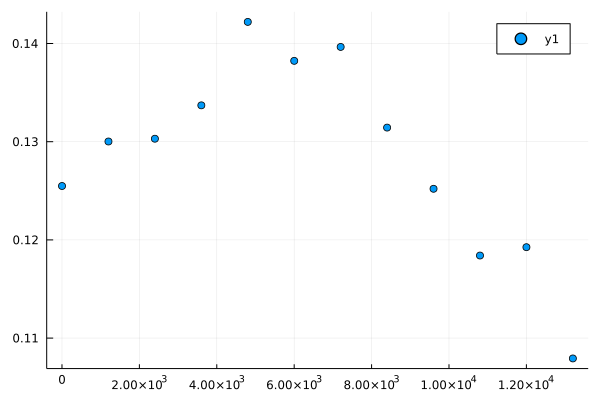

In [41]:
T = 14400
a_data = [443, 459, 460, 472, 502, 488, 493, 464, 442, 418, 421, 381]
g_data = (a_data .* r) ./ (1200 * v_śr)
scatter(1:1200:T, g_data)

Korzystając z biblioteki LsqFit dostępnej w Julii udało nam się dopasować krzywą do danych. Jako funkcję bazową przyjęliśmy
$$ g(t) = \alpha \cdot \mathrm{sin}(\omega t + \beta) + \delta, $$
gdzie $\alpha, \omega, \beta, \delta$ są szukanymi parametrami.

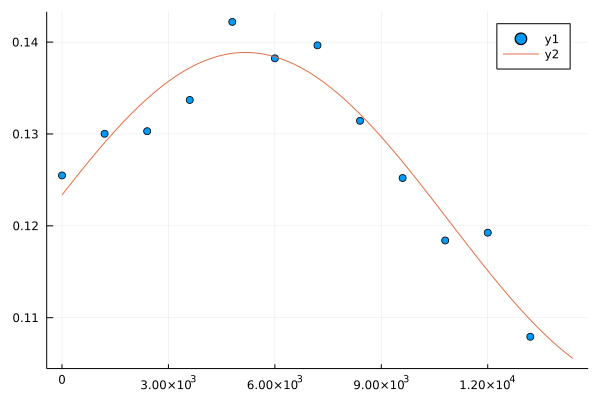

α = 0.018324322893360088
ω = 0.00027397274511868646
β = 0.15374474359150253
δ = 0.1205473154488817


In [42]:
g_mod(t, p) = p[1] .* sin.(p[2] .* t .+ p[3]) .+ p[4]
g_fit = curve_fit(g_mod, 1:1200:T, g_data, [1.0, 0.0005, 0.0, 0.0])

scatter(1:1200:T, g_data)
plt = plot!(1:T, g_mod(1:T, g_fit.param))
display(plt)

symbols = ["α", "ω", "β", "δ"]
for param in zip(symbols, g_fit.param) 
    println(param[1], " = ", param[2])
end

Z wykresu widzimy jak gęstość zmienia się w godzinach szczytu.

##### Przepustowość
Przepustowość otrzymaliśmy licząc ilość aut przejeżdżających na zielonym świetle, dzieląc przez ten czas oraz domnażając $r$ (według wzoru na $p$).

In [43]:
capacity = DataTable(Czas = [56, 56, 53], Auta = [46, 48, 51])
average_capacity = r * sum([n[2]/n[1] for n in capacity[:,1]]) / length(capacity[:,1])
show(capacity)
print("\n\nŚrednia przepustowość: ", average_capacity)

3x2 DataTable
Czas │ Auta
─────┼─────
56   │ 46  
56   │ 48  
53   │ 51  0.8802785265049415


Średnia przepustowość: 3.1273052915307136

Otrzymany wynik dotyczy oczywiście przepustowości podczas światła zielonego. Podczas, gdy świeci się światło czerwone wynosi ona zero.

### Model podstawowy  <a class="anchor" id="4.3"></a>
Wyniki pomiarów podstawiliśmy do pierwszego modelu i otrzymaliśmy
$$ L' = \frac{13,21 \cdot g(t) - p(t)}{1 - g(t)}, $$
gdzie
$$ g(t) = \alpha \cdot \mathrm{sin}(\omega t + \beta) + \delta $$
($\alpha, \omega, \beta, \delta$ takie jak dostaliśmy powyżej),
$$ p(t) = \left\{ \begin{array}{lrl} 3 & \mathrm{dla} & 98n < t \leq 98n + 38 \\ 0 & \mathrm{dla} & 98n + 38 < t \leq 98(n+1) \\ \end{array} \right. , \hspace{0.5cm} n \in \mathbb{N}. $$
Spodziewamy się, że długość korka może spaść poniżej zera, a więc żeby uniknąć sprzeczności, do wyliczenia rozwiązania skorzystamy z metod numerycznych, a konkretnie z metody Eulera niejawnej, czyli
$$ L_n = L_{n-1} + L'(t_{n}), $$
gdzie $t_n = n [ \mathrm{s} ],\ \ \ n = 1, 2, ...$

Pryjmijmy $L_0 = 0$. W kodzie uwzględnimy warunek, że $L \geq 0$.

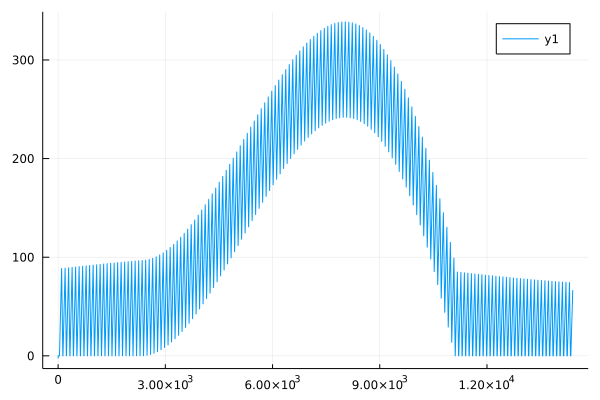

In [47]:
g(t) = g_fit.param[1] * sin(g_fit.param[2] * t + g_fit.param[3]) + g_fit.param[4]

function p(t)
    if 0 < t % 98 <= 38
        return 3.6
    else
        return 0.0
    end
end

# Wartości L'(t)
dL = (v_śr .* g.(1:T) .- p.(1:T)) ./ (1 .- g.(1:T))

# Metodą Eulera wyliczamy wartości L(t)
L = [dL[1]]
for t in 2:T
    l = L[t-1] + dL[t]
    if l <= 0
        append!(L, 0)
    else
        append!(L, l)
    end
end

plot(1:T, L)

### Model z opóźnieniem  <a class="anchor" id="4.4"></a>

Przypomnijmy równanie tego modelu:
$$ L' = \frac{v_{śr} g(t) - p\left(t - \frac{L}{v_f}\right)}{1 - g(t) - \frac{1}{v_f} p \left(t - \frac{L}{v_f} \right)}. $$
Funkcje $g$ i $p$ są takie, jak w poprzednim podpunkcie.

Do rozwiązania tego równania skorzystaliśmy z metody Eulera niejawnej, czyli
$$ L_n = L_{n-1} + a \cdot \frac{v_{śr} \cdot g(t_{n-1}) - p\left(t_{n-1} - \frac{L_{n-1}}{v_f}\right)}{1 - g(t_{n-1}) - \frac{1}{v_f} p \left(t_{n-1} - \frac{L_{n-1}}{v_f} \right)}, $$
gdzie <br>
$t_n = 0,1n [ \mathrm{s} ],\ \ \ n = 1, 2, ...$<br>
$a = t_n - t_{n-1} = 0,1\mathrm{s}$.

Przymijmy ponownie $L_0 = 0$.

In [49]:
L = [0.0]
a = 0.1  # Krok czasu

for t in a:a:T-a
    index = Int(round(t/a))
    dL = a * (v_śr * g(t) - p(t - L[index]/v_f)) / (1 - g(t) - p(t - L[index]/v_f)/v_f)
    l = L[index] + dL
    if l <= 0
        append!(L, 0)
    else
        append!(L, l)
    end
end

plot(a:a:T, L)

## Inne przykłady <a class="anchor" id="5"></a>

### Zwężenie na utostradzie <a class="anchor" id="5.1"></a>
Załóżmy, że na autostradzie dwupasmowej zostaje utworzone zwężenie drogi do jednego pasa ruchu (np. z powodu robót drogowych). Skutkiem tego przepustowość się zmniejsza, a ponieważ natężenie na autostradzie jest z reguły duże i najprawdopodobniej większe od przepustowości, to zaczyna tworzyć się korek. Rozpatrzmy taką sytuację na odcinku autostrady A4 od Kątów Wrocławskich do Pietrzykowic. Na polskiej stronie rządowej można znaleźć dane z Generalnego Pomiaru Ruchu 2020/2021 dotyczące średniego dobowego ruchu rocznego na tym odcinku.

Z poprzednich pomiarów do obliczeń wykorzystamy średnią długość samochodu $r = 3,55 \mathrm{m}$ oraz prędkość fali $ v_f = 6,31 \frac{\mathrm{m}}{\mathrm{s}} $, ponieważ wartości te są dość uniwersalne. Na autostradzie w znacznej ilości pojawiają się także inne pojazdy, więc będziemy liczyć je w następujący sposób:
- motocykl - $r$
- sam. osobowy - $r$
- sam. dostawczy - $1,5r$
- sam. ciężarowy bez przyczepy - $1,5r$
- sam. ciężarowy z przyczepą - $2r$
- autobus - $2r$

Jeżeli teraz policzymy średnią długość pojazdu dostaniemy $r_{śr} = $

Przyjmijmy $v_{śr} = 120 \frac{\mathrm{km}}{\mathrm{h}} = 33,33\frac{\mathrm{m}}{\mathrm{s}} $.<br>
$t = 24 \mathrm{h} = 86400\mathrm{s}$<br>
Policzmy teraz gęstość:
$$ g = \frac{ar_{śr}}{v_{śr}t} = \frac{62776 \cdot }{33,33 \cdot 86400} =  $$
Zakładamy, że gestość jest stała i równa $g$. Podobnie jest w przypadku przepustowości.
Przyjmijmy, że przez zwężenie przejeżdża jeden pojazd na 2 sekundy, czyli
$$ p = \frac{ar_{śr}}{t} = \frac{1 \cdot }{2} = $$

Mając już wszystkie potrzebne dane, podstawiamy do pierwszego modelu
$$ L' = \frac{v_{śr} g - p}{1 - g} = \frac{13.21 \cdot g - p}{1 - g} =  $$
$L'$ jest stałe, a więc $L(t)$ będzie funkcją liniową: $L(t) = $

Podobnie będzie dla drugiego modelu:
$$ L' = \frac{v_{śr} g - p}{1 - g - \frac{p}{v_f}} = \hspace{0.5cm} => \hspace{0.5cm} L(t) =  $$

Zobaczmy, jak wyglądają wykresy.

### Rondo <a class="anchor" id="5.2"></a>



## Podsumowanie i wnioski <a class="anchor" id="6"></a>

Wyprowadziliśmy dwa równania, które następnie, po dopasowaniu do prawdziwej sytuacji, rozwiązalismy za pomocą metod numerycznych. Wyniki okazały się być zbliżone do rzeczywistości, co potwierdza, że przedstawione modele mogą mieć zastosowanie w modelowaniu korków drogowych. W szczególności model drugi, który uwzględnia opóźnienie w ruszaniu kolejnych samochodów. Z przeprowadzonych badań dowiedzieliśmy się także, jak ogromny wpływ na tworzenie się korka ma choćby niewielka zmiana czasów świateł zielonego i czerwonego.

## Literatura i inne źródła <a class="anchor" id="7"></a>
- [1]
- [2]